In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv('/content/drive/My Drive/38891_59255/cleaned_dataset_train.csv')

In [4]:
df.isna().sum()

Unnamed: 0      0
label           0
tweet           0
clean_tweet    11
Hashtags        0
dtype: int64

In [5]:
df['clean_tweet'].fillna('Null',inplace=True)

In [6]:
df.isna().sum()

Unnamed: 0     0
label          0
tweet          0
clean_tweet    0
Hashtags       0
dtype: int64

In [7]:
df

,Unnamed: 0,label,tweet,clean_tweet,Hashtags
0,0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,2,0,bihday your majesty,bihday majesti,No hashtags
3,3,0,#model i love u take with u all the time in ...,#model love take time urd+-!!! dddd d|d|d|,#model
4,4,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation
...,...,...,...,...,...
29525,31956,0,off fishing tomorrow @user carnt wait first ti...,fish tomorrow carnt wait first time year,No hashtags
29526,31957,0,ate @user isz that youuu?ðððððð...,"ate isz youuu?ddddddddda$?i,",No hashtags
29527,31958,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...,#shame #imwithher
29528,31959,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad,No hashtags


In [8]:
df.drop(['Unnamed: 0','tweet','Hashtags'], axis = 1,inplace=True)

In [9]:
df.head()

,label,clean_tweet
0,0,father dysfunct selfish drag kid dysfunction. ...
1,0,thank #lyft credit can't use caus offer wheelc...
2,0,bihday majesti
3,0,#model love take time urd+-!!! dddd d|d|d|
4,0,factsguide: societi #motiv


In [10]:
 dff = df.drop(['label'], axis = 1)

In [160]:
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(df.label), test_size=0.1)

In [161]:
X_test.shape, X_temp.shape, len(y_test), len(y_temp)

((2953, 1), (26577, 1), 2953, 26577)

In [162]:
X_temp['label'] = y_temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [163]:
X_temp.head()

,clean_tweet,label
27133,wtf great girl group disband complete. wrong w...,0
24839,#rift #idink #beawar #findesemain #marx click ...,0
11166,absolut best day sister' graduation! #bestday ...,0
826,money. campaign ask $100k donat midnight fight...,0
25806,"ref far worst, inconsist group major spo. real...",0


In [164]:
nonhate = X_temp[X_temp['label'] == 0]
nonhate.shape[0]

24772

In [165]:
hate = X_temp[X_temp.label == 1]
hate.shape[0]

1805

In [166]:
nonhatesample = nonhate.sample(n = hate.shape[0])
nonhatesample.shape

(1805, 2)

In [167]:
ds = pd.concat([hate, nonhatesample], axis = 0)

In [168]:
ds

,clean_tweet,label
6236,".@user use phrase like #sandnigg accept ya, hm...",1
2289,check post! confession: i'm #america #controve...,1
17731,racism home anti- advic others: we'r good both.,1
2805,correct way written!!! matter profession!!! cl...,1
23102,"#cuomo: #paladino' ', ugly' comment #obama emb...",1
...,...,...
1022,thank pour tea razer blackwidow chroma #kid #d...,0
5712,#bless teach #rooftopyoga #zhotelnyc tonight 7...,0
7471,#e3 without cover togeth #g4waslif #missyouguy,0
8167,get see boy tonight dd #datenight,0


In [169]:
testdf = X_test
testdf['label'] = y_test
testdf.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(2953, 2)

In [170]:
len(testdf[testdf['label']==0]),len(testdf[testdf['label']==1])

(2745, 208)

In [171]:
ds = pd.concat([ds, testdf], axis = 0)

In [172]:
ds[ds['label']==0].shape, ds[ds['label']==1].shape

((4550, 2), (2013, 2))

In [193]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][0])

### Creating Bag Of Words

In [268]:
vectorizer_train = CountVectorizer(max_features=1000)
vocabulary_train = vectorizer_train.fit_transform(corpus)
bow = pd.DataFrame(vocabulary_train.toarray(), columns = vectorizer_train.get_feature_names())

In [269]:
bow['labelxyz'] = list(ds.label)

In [270]:
bow_hate = bow[bow.labelxyz == 1]
bow_nonhate = bow[bow.labelxyz == 0]
X_train_hate = bow_hate.sample(frac=0.9, random_state=0)
X_test_hate = bow_hate.drop(X_train_hate.index)
X_train_nonhate =  bow_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = bow_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
bow_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
bow_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

### Creating TF-IDF 

In [206]:
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(corpus)
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
df2_train = pd.DataFrame(denselist1, columns=feature_names1)

In [208]:
tdf = df2_train
tdf['labelxyz'] = list(ds.label)

In [209]:
tdf_hate = tdf[tdf.labelxyz == 1]
tdf_hate.shape

(1810, 1001)

In [210]:
tdf_nonhate = tdf[tdf.labelxyz == 0]
tdf_nonhate.shape

(1810, 1001)

In [211]:
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)

In [212]:
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)

In [213]:
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
tfdf_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
tfdf_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

# Building ML models

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns

In [272]:
model = ['LR','RF','DT','KN','GN','GB']
accuracy = {'BOW':[], 'TF-IDF':[]}
recall = {'BOW':[], 'TF-IDF':[]}

### Logistic Regression

In [273]:
#BOW
regressor_LR_bow = LogisticRegression()
regressor_LR_bow.fit(bow_train,y_train)
y_predict_LR_bow = regressor_LR_bow.predict(bow_test)
accuracy['BOW'].append(regressor_LR_bow.score(bow_test,y_test))
recall['BOW'].append(recall_score(y_test, y_predict_LR_bow))

#TF-IDF
regressor_LR_tf = LogisticRegression()
regressor_LR_tf.fit(tfdf_train,y_train)
y_predict_LR_tf = regressor_LR_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(regressor_LR_tf.score(tfdf_test,y_test))
recall['TF-IDF'].append(recall_score(y_test, y_predict_LR_tf))

In [274]:
pd.DataFrame(data=[['BOW',regressor_LR_bow.score(bow_test,y_test),recall_score(y_test, y_predict_LR_bow)],
                   ['TF-IDF',regressor_LR_tf.score(tfdf_test,y_test),recall_score(y_test, y_predict_LR_tf)]],
             columns=['','Accuracy','Recall'])


,,Accuracy,Recall
0,BOW,0.713376,0.955801
1,TF-IDF,0.613057,0.983425


### Random Forest

In [275]:
#BOW
model_RF_bow = RandomForestClassifier()
model_RF_bow.fit(bow_train,y_train)
y_predict_RF_bow = model_RF_bow.predict(bow_test)
accuracy['BOW'].append(model_RF_bow.score(bow_test,y_test))
recall['BOW'].append(recall_score(y_test, y_predict_RF_bow))

#TF-IDF
model_RF_tf = RandomForestClassifier()
model_RF_tf.fit(tfdf_train,y_train)
y_predict_RF_tf = model_RF_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(model_RF_tf.score(tfdf_test,y_test))
recall['TF-IDF'].append(recall_score(y_test, y_predict_RF_tf))

In [277]:
pd.DataFrame(data=[['BOW',model_RF_bow.score(bow_test,y_test),recall_score(y_test, y_predict_RF_bow)],
                   ['TF-IDF',model_RF_tf.score(tfdf_test,y_test),recall_score(y_test, y_predict_RF_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.784236,0.806630
1,TF-IDF,0.730892,0.845304


### Decision Tree

In [278]:
#BOW
model_DT_bow = DecisionTreeClassifier() 
model_DT_bow.fit(bow_train,y_train)
y_predict_DT_bow = model_DT_bow.predict(bow_test)
accuracy['BOW'].append(model_DT_bow.score(bow_test,y_test))
recall['BOW'].append(recall_score(y_test, y_predict_DT_bow))

#TF-IDF
model_DT_tf = DecisionTreeClassifier() 
model_DT_tf.fit(tfdf_train,y_train)
y_predict_DT_tf = model_DT_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(model_DT_tf.score(tfdf_test,y_test))
recall['TF-IDF'].append(recall_score(y_test, y_predict_DT_tf))


In [279]:
pd.DataFrame(data=[['BOW',model_DT_bow.score(bow_test,y_test),recall_score(y_test, y_predict_DT_bow)],
                   ['TF-IDF',model_DT_tf.score(tfdf_test,y_test),recall_score(y_test, y_predict_DT_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.772293,0.745856
1,TF-IDF,0.755573,0.801105


### K neighbors

In [280]:
#BOW
model_KN_bow = DecisionTreeClassifier() 
model_KN_bow.fit(bow_train,y_train)
y_predict_KN_bow = model_KN_bow.predict(bow_test)
accuracy['BOW'].append(model_KN_bow.score(bow_test,y_test))
recall['BOW'].append(recall_score(y_test, y_predict_KN_bow))

#TF-IDF
model_KN_tf = DecisionTreeClassifier() 
model_KN_tf.fit(tfdf_train,y_train)
y_predict_KN_tf = model_KN_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(model_KN_tf.score(tfdf_test,y_test))
recall['TF-IDF'].append(recall_score(y_test, y_predict_KN_tf))

In [281]:
pd.DataFrame(data=[['BOW',model_KN_bow.score(bow_test,y_test),recall_score(y_test, y_predict_KN_bow)],
                   ['TF-IDF',model_KN_tf.score(tfdf_test,y_test),recall_score(y_test, y_predict_KN_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.778662,0.745856
1,TF-IDF,0.742834,0.806630


### GaussianNB

In [282]:
#BOW
model_GN_bow = GaussianNB() 
model_GN_bow.fit(bow_train,y_train)
y_predict_GN_bow = model_GN_bow.predict(bow_test)
accuracy['BOW'].append(model_GN_bow.score(bow_test,y_test))
recall['BOW'].append(recall_score(y_test, y_predict_GN_bow))

#TF-IDF
model_GN_tf = DecisionTreeClassifier() 
model_GN_tf.fit(tfdf_train,y_train)
y_predict_GN_tf = model_GN_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(model_GN_tf.score(tfdf_test,y_test))
recall['TF-IDF'].append(recall_score(y_test, y_predict_GN_tf))

In [283]:
pd.DataFrame(data=[['BOW',model_GN_bow.score(bow_test,y_test),recall_score(y_test, y_predict_GN_bow)],
                   ['TF-IDF',model_GN_tf.score(tfdf_test,y_test),recall_score(y_test, y_predict_GN_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.804936,0.646409
1,TF-IDF,0.749204,0.801105


### Gradient Boosting

In [284]:
#BOW
model_GB_bow = GradientBoostingClassifier()
model_GB_bow.fit(bow_train,y_train)
y_predict_GB_bow = model_GB_bow.predict(bow_test)
accuracy['BOW'].append(model_GB_bow.score(bow_test,y_test))
recall['BOW'].append(recall_score(y_test, y_predict_GB_bow))

#TF-IDF
model_GB_tf = DecisionTreeClassifier() 
model_GB_tf.fit(tfdf_train,y_train)
y_predict_GB_tf = model_GB_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(model_GB_tf.score(tfdf_test,y_test))
recall['TF-IDF'].append(recall_score(y_test, y_predict_GB_tf))

In [285]:
pd.DataFrame(data=[['BOW',model_GB_bow.score(bow_test,y_test),recall_score(y_test, y_predict_GB_bow)],
                   ['TF-IDF',model_GB_tf.score(tfdf_test,y_test),recall_score(y_test, y_predict_GB_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.484076,0.98895
1,TF-IDF,0.748408,0.78453


# Evaluation


In [286]:
data_bow = {'model':model,'accuracy':accuracy['BOW'],'recall':recall['BOW']}
compare_models_bow = pd.DataFrame(data_bow)
compare_models_bow

,model,accuracy,recall
0,LR,0.713376,0.955801
1,RF,0.784236,0.806630
2,DT,0.772293,0.745856
3,KN,0.778662,0.745856
4,GN,0.804936,0.646409
5,GB,0.484076,0.988950


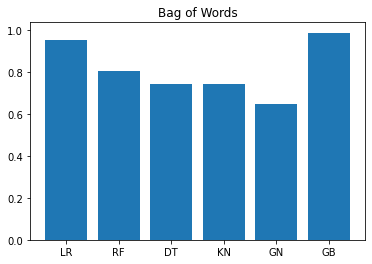

In [287]:
acc_bow = plt.bar(compare_models_bow['model'],compare_models_bow['recall'])
plt.title('Bag of Words')
plt.show()

In [288]:
data_tf = {'model':model,'accuracy':accuracy['TF-IDF'],'recall':recall['TF-IDF']}
compare_models_tf = pd.DataFrame(data_tf)
compare_models_tf

,model,accuracy,recall
0,LR,0.613057,0.983425
1,RF,0.730892,0.845304
2,DT,0.755573,0.801105
3,KN,0.742834,0.806630
4,GN,0.749204,0.801105
5,GB,0.748408,0.784530


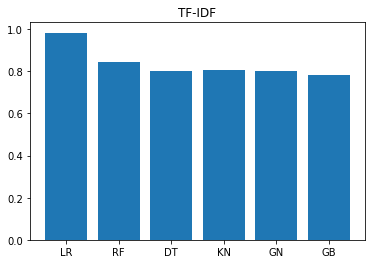

In [289]:
acc_bow = plt.bar(compare_models_tf['model'],compare_models_tf['recall'])
plt.title('TF-IDF')
plt.show()

Keeping both recall value and accuracy in mind our best model is Logistic Regression with TF-IDF


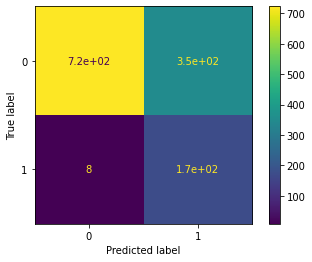

In [291]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(regressor_LR_bow,bow_test,y_test)

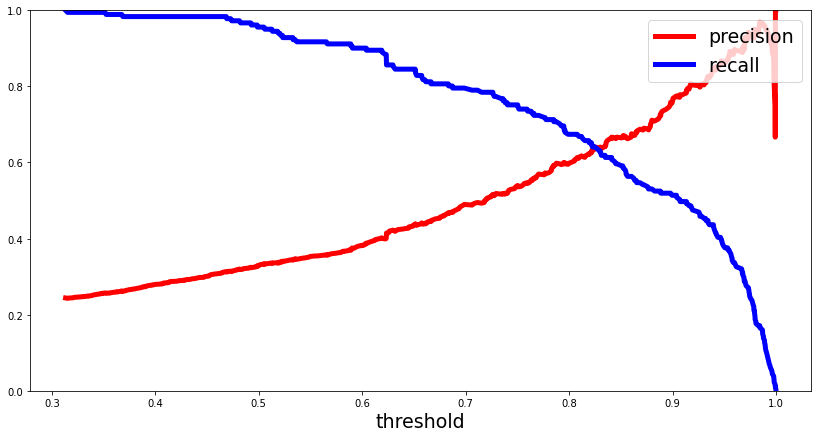

In [292]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = regressor_LR_bow.predict_proba(bow_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)

In [265]:
from sklearn.metrics import roc_curve


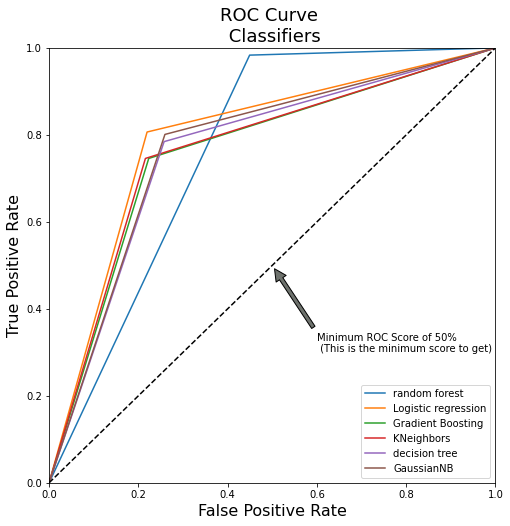

In [293]:
LR_fpr, LR_tpr, threshold = roc_curve(y_test,y_predict_LR_tf)
RF_fpr, RF_tpr, threshold = roc_curve(y_test, y_predict_RF_bow)
DT_fpr, DT_tpr, thresold = roc_curve(y_test, y_predict_DT_bow)
KN_fpr, KN_tpr, thresold = roc_curve(y_test, y_predict_KN_bow)
GB_fpr, GB_tpr, threshold = roc_curve(y_test, y_predict_GB_tf)
GN_fpr, GN_tpr, threshold = roc_curve(y_test, y_predict_GN_tf)


def graph_roc_curve_multiple(LR_fpr, LR_tpr, RF_fpr, RF_tpr, DT_fpr, DT_tpr, KN_fpr, KN_tpr, GB_fpr, GB_tpr, GN_fpr, GN_tpr,):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(RF_fpr, RF_tpr, label='random forest')
    plt.plot(LR_fpr, LR_tpr, label='Logistic regression')
    plt.plot(GB_fpr, GB_tpr, label='Gradient Boosting')
    plt.plot(KN_fpr, KN_tpr, label='KNeighbors')
    plt.plot(DT_fpr, DT_tpr, label='decision tree')
    plt.plot(GN_fpr, GN_tpr, label='GaussianNB')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(RF_fpr, RF_tpr, LR_fpr, LR_tpr,GB_fpr, GB_tpr, KN_fpr, KN_tpr, DT_fpr, DT_tpr,GN_fpr, GN_tpr)
plt.show()

In [297]:
from sklearn.metrics import roc_auc_score
lr_a_score = roc_auc_score(y_test, regressor_LR_tf.predict_proba(tfdf_test)[:,1])
rf_a_score = roc_auc_score(y_test, model_RF_tf.predict_proba(tfdf_test)[:,1])
gb_a_score = roc_auc_score(y_test, model_GB_tf.predict_proba(tfdf_test)[:,1])
kn_a_score = roc_auc_score(y_test, model_KN_tf.predict_proba(tfdf_test)[:,1])
dt_a_score = roc_auc_score(y_test, model_DT_tf.predict_proba(tfdf_test)[:,1])
gn_a_score = roc_auc_score(y_test, model_GN_tf.predict_proba(tfdf_test)[:,1])

print("ROC-AUC-Score:")
print("LR:", lr_a_score)
print("RF:", rf_a_score)
print("GB:", gb_a_score)
print("KN:", kn_a_score)
print("DT:", dt_a_score)
print("GN:", gn_a_score)


ROC-AUC-Score:
LR: 0.9248284723114479
RF: 0.8957497109083901
GB: 0.7789618399074907
KN: 0.7856019529744315
DT: 0.7900706668379802
GN: 0.7845997687267121
